## Mock Exam

Based on the lecture materials, the following problems are designed to cover your initial learning of python and onto applications of the various ML techniques with a toy datasets that you will first form.

The necessary imports are provided for you, however we recommend looking up each of the libraries / packages as you encounter them to help you with the answers. Understanding and reading the application of these packages is a fundamental aspect of writing efficent code. We recommend using the # key to annotate your code as this will make it easier for you to come back to the problems.

Please hand in the HTML and IPYNB files of your answers.

Parts of the notebook have been set up in advance for you - do not change these or you will only complicate your work. You are expected to fill in the blanks on the provided code, such that the cell will run and achieve its task. Most of the questions will require you to complete earlier questions.

In [7]:
# required imports for your test. We will test that these all work before you start your exam. 

#%matplotlib notebook
#Standard imports for data science with python
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd

#Imports for plotting using matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
plt_style = 'fivethirtyeight'

#Imports for advanced visualisation / analytical methods

import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Create a toy dataset to work with

step 1: Create the data using sklearns make_classification (We have provided this for you already). Print the shape of the generated data.

step 2: Save the data as an npy file

step 3: Use kernel density estimation on the X data (you don't have to understand this to use it - this is just to see how well you can handle unknown models. This means you will need to read the documentation)


In [8]:
# Step 1: make an X and y dataset with 2 features that classifies the y as a binary 1 or 0
# This is provided for you already:
X, y = make_classification(n_samples=100, 
                           n_features=3, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_repeated=0, 
                           n_classes=2, 
                           n_clusters_per_class=1, 
                           class_sep=1.0)

In [9]:
# print the shape of X and y


In [10]:
# ANSWER
print(X.shape, y.shape)

(100, 3) (100,)


Step 2: save the data using np.save(). Check the documentation to see how to do it. Remember that a string (str) needs ' '

In [11]:
# save the X data as an npy file called X.npy

# save the y data as an npy file called y.npy


In [12]:
# ANSWWER
# save the X data as an npy file called X.npy
np.save('X.npy',X)
# save the y data as an npy file called y.npy
np.save('y.npy',y)


Step 3: Plotting and interpreting the data using kernel density estimation

Use an appropriate kde plot from seaborn to visualise one the first(zeroth in python) dimension (univariate) and then try two (bivariate). 

**Recall slicing array data, ":" denotes taking all the data in that axis, for example X[:,1] would take all the data in the 2nd axis**

There are blank spaces for you to fil in kdeplot on 2 lines.


In [13]:
#Univariate
sns.kdeplot( ) # fill in here 1 dimension of the input data
plt.show()
#Bivariate
ax = sns.kdeplot( , , shade=True) # fill in here 2 dimensions of your choice input data
plt.show()

SyntaxError: invalid syntax (<ipython-input-13-2cc8623d95d9>, line 5)

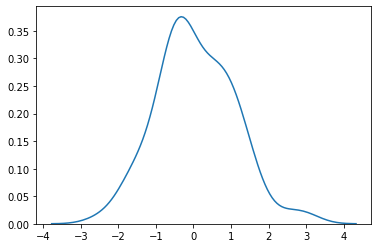

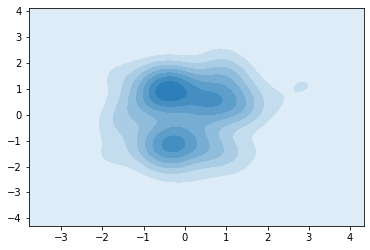

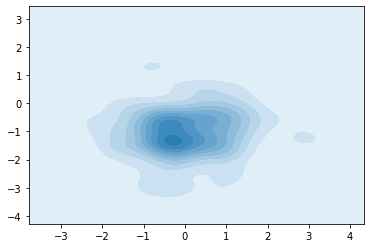

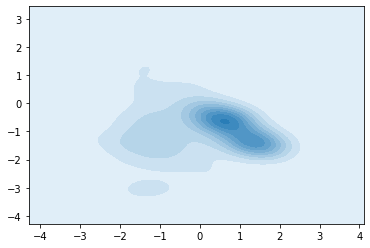

In [16]:
# ANSWER
#Univariate
sns.kdeplot(X[:,0])
plt.show()
#Bivariate
ax = sns.kdeplot(X[:,0], X[:,1], shade=True)
plt.show()
ax = sns.kdeplot(X[:,0], X[:,2], shade=True)
plt.show()
ax = sns.kdeplot(X[:,1], X[:,2], shade=True)
plt.show()

## Principle Component Analysis

Step 1: Scale the data using StandardScaler

Step 2: Run the PCA algorithm from sklearn

Step 3: Plot the Principle Components

**Note you don't have to understand this theory, just read the documentation https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform**

In [17]:
# Scale the data

scaler = StandardScaler() 
X_scale = scaler.fit_transform( ) # fill in this line with the appropriate variable

# lets check it worked
for i in range(3):
    print(f"mean of {np.mean(X_scale[:,i])}, standard deviation of  {np.std(X_scale[:,i])}")

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [18]:
#ANSWER:

scaler = StandardScaler() 
X_scale = scaler.fit_transform(X) 

for i in range(3):
    print(f"mean of {np.mean(X_scale[:,i])}, standard deviation of  {np.std(X_scale[:,i])}")

mean of -1.3322676295501878e-17, standard deviation of  0.9999999999999999
mean of 2.5465740627339528e-17, standard deviation of  0.9999999999999999
mean of 2.1538326677728036e-16, standard deviation of  0.9999999999999999


In [19]:
# Run PCA with 2 components

pca = PCA( ) # initialize with n = 2 components, read the docs if you need to find the right keywords
pca.fit( ) # fill in here

plt.bar(list(range(1,4)), pca.explained_variance_ratio_)
plt.xlabel('PCs')
plt.ylabel('%')
plt.ylim(0,1)
plt.title('explained variance ratios')
print('The sum of the explained variance ratios is:' , sum(pca.explained_variance_ratio_))

# run the pca on the X_scale data
X_pca = pca.fit_transform() # fill in here

TypeError: fit() missing 1 required positional argument: 'X'

The sum of the explained variance ratios is: 0.9999999999999999


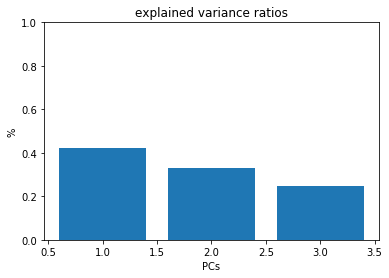

In [20]:
#ANSWER
pca = PCA(n_components=3) # initialize with n = 2 components, read the docs if you need to find the right keywords
pca.fit(X_scale) # fill in here

plt.bar(list(range(1,4)), pca.explained_variance_ratio_)
plt.xlabel('PCs')
plt.ylabel('%')
plt.ylim(0,1)
plt.title('explained variance ratios')
print('The sum of the explained variance ratios is:' , sum(pca.explained_variance_ratio_))

# run the pca on the X_scale data
X_pca = pca.fit_transform(X_scale) # fill in here

## 4 Clustering

Because we made the dataset ourselves, we know there are 2 clusters in here, so please confirm this using KMeans clustering. 

**https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html**



In [21]:
# run kmeans
kmeans = KMeans( , random_state=0) # initialize the kmeans model with 2 clusters (check the documentation for keywords)
kmeans.fit( ) # fill in here with pca transformed X data

# plot the first 2 PCs
# hint: the first PC looks like this: X_pca[:,0]
plt.scatter( , ,c=kmeans.labels_)
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-06d397195ef9>, line 2)

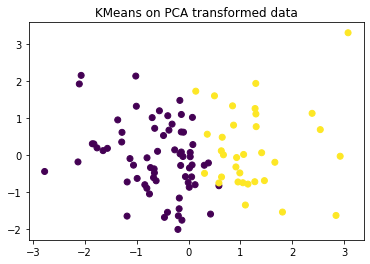

In [22]:
#ANSWERS

kmeans = KMeans(n_clusters=2, random_state=0) # initialize the kmeans model with 2 clusters (check the documentation for keywords)
kmeans.fit(X_pca) # fill in here with pca transformed X data

plt.scatter(X_pca[:,0], X_pca[:,1],c=kmeans.labels_)
plt.title('KMeans on PCA transformed data')
plt.show()




## Classification

Step 1: choose the correct model to classify the the data

Step 2: Train_test_split the data, the test size should be set at 33%

Step 3: Train the model on the train data

Step 4: Validate the model with test data using the "score" function

Step 5: Discuss metrics for measuring how useful these models would be. Name at least 2 ways to measure the performance

In [23]:
#Step 1: Choose the model
# IMPORT HERE: which will look somethin like from ___ import ____


In [24]:
# ANSWER
from sklearn.linear_model import LogisticRegression

In [62]:
# Step 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split()

ValueError: At least one array required as input

In [63]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [64]:
# Step 3
clf = # Choose the model here
clf.fit( )# fill in here


SyntaxError: invalid syntax (<ipython-input-64-dae395091704>, line 2)

In [65]:
# ANSWER
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\nebarlow\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Step 4, find the score value from the held back test data


In [67]:
# ANSWER
clf.score(X_test,y_test)

0.9090909090909091

In [68]:
# Step 5, name at least 2 other metrics for this model we could use


In [69]:
# ANSWER
# 1 ROC curve
# 2 AUC of ROC
# 3 confusion matrix
# .... other

# Python Functions putting it all together
Make the code below into a function that forms a classification analysis pipeline for what has come before. Remember that there should be 4 space indents after the function defintion:

The input arguments should be the string file names for the X.npy and y.npy files and the outputs (returns) should be the model_score.

In [81]:
# fill in here
    X = np.load(X_file)
    y = np.load(y_file)
    X_scale = # Fill in here from 
    X_train, X_test, y_train, y_test = train_test_split() # Fill in here
    clf.fit() # Fill in hre
    model_score = clf.score() # Fill in here
    return 

IndentationError: unexpected indent (<ipython-input-81-13933897cc0d>, line 2)

In [88]:
# answer
def pipeline(X_file, y_file): # fill in here
    X = np.load(X_file)
    y = np.load(y_file)
    X_scale = scaler.fit_transform(X) # Fill in here
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.33) # Fill in here
    clf.fit(X_train, y_train) # Fill in here
    model_score = clf.score(X_test, y_test)
    return model_score # Fill in here 



In [89]:
# Try it out here:
X_file, y_file = "X.npy", "y.npy"
pipeline(X_file, y_file)

C:\Users\nebarlow\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8181818181818182